## Analysis 2: Social Activity and Wellness

**Method: Simple Linear Regression**

This analysis aims to explore the relationship (if any) between time spent on hobbies and feelings of loneliness. Specifically, we are testing whether more time spent on hobbies is associated with lower loneliness scores. 

The null hypothesis states that there is no relationship between time spent on hobbies and loneliness. The alternative hypothesis suggests that time spent on hobbies have a relation with loneliness.

Conditions for linear regression, such as linearity, independence, homoscedasticity, and normality of residuals, will support either hypothesis depending on the data's behavior.

**Independent Variables: LIFESTYLE_time_use_priorities_hobbies_actual**

**Dependent Variable: LONELY_dejong_emotional_social_loneliness_scale_score**

In [17]:
import pandas as pd

# Load dataset with low memory flag to avoid warnings
url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
data = pd.read_csv(url, low_memory=False)

# Focus on relevant columns only
variables_of_interest = ['LONELY_dejong_emotional_social_loneliness_scale_score', 'LIFESTYLE_time_use_priorities_hobbies_actual']
subset_data = data[variables_of_interest]

# General overview
print("Dataset Info for Relevant Variables:")
print(subset_data.info())  # Get info on data types and NA values

# Descriptive statistics for the selected variables
print("\nDescriptive Statistics for Relevant Variables:")
print(subset_data.describe())  # Summary statistics

# Check for unique values in LONELY_dejong_emotional_social_loneliness_scale_score
print("\nUnique values in LONELY_dejong_emotional_social_loneliness_scale_score:")
print(subset_data['LONELY_dejong_emotional_social_loneliness_scale_score'].unique())

# Check for NA values in the subset
print("\nMissing Values per Column in Relevant Variables:")
print(subset_data.isna().sum())


Dataset Info for Relevant Variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11431 entries, 0 to 11430
Data columns (total 2 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   LONELY_dejong_emotional_social_loneliness_scale_score  8561 non-null   float64
 1   LIFESTYLE_time_use_priorities_hobbies_actual           196 non-null    float64
dtypes: float64(2)
memory usage: 178.7 KB
None

Descriptive Statistics for Relevant Variables:
       LONELY_dejong_emotional_social_loneliness_scale_score  \
count                                        8561.000000       
mean                                            3.773274       
std                                             1.823360       
min                                             0.000000       
25%                                             2.000000       
50%                                     

## Relevant Observations

The dataset shows significant missing data, with over 7,500 missing values for LONELY_ucla_loneliness_scale_score and over 11,000 missing values for LIFESTYLE_time_use_priorities_hobbies_actual. The loneliness scale appears to range from 3 to 9, with higher values indicating greater loneliness. The time spent on hobbies ranges from 1 to 13, with a mean of about 7 hours. This imbalance in missing data should be addressed before we perform a simple linear regression.

In [18]:
# Replace 'LONELY_ucla_loneliness_scale_score' with 'LONELY_dejong_emotional_social_loneliness_scale_score'
subset_data = data[['LONELY_dejong_emotional_social_loneliness_scale_score', 'LIFESTYLE_time_use_priorities_hobbies_actual']]

# Remove rows with missing values in either of the two variables
clean_data = subset_data.dropna(subset=['LONELY_dejong_emotional_social_loneliness_scale_score', 'LIFESTYLE_time_use_priorities_hobbies_actual'])

# Verify the result
print(clean_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 27 to 11422
Data columns (total 2 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   LONELY_dejong_emotional_social_loneliness_scale_score  194 non-null    float64
 1   LIFESTYLE_time_use_priorities_hobbies_actual           194 non-null    float64
dtypes: float64(2)
memory usage: 4.5 KB
None


## Removing N/A values

The results show that after removing rows with missing values, there are 194 valid entries remaining in the dataset. These entries have no missing values for either LONELY_dejong_emotional_social_loneliness_scale_score or LIFESTYLE_time_use_priorities_hobbies_actual, meaning they contain complete data for both variables. Both columns are of type float64. This means that we now have a subset of data with complete answers for both loneliness and time spent on hobbies, ready for any further analysis.

## Step 1: Visualizing the Relationship (Hexbin Plot)

Before fitting a simple regression model, we need to check whether there is a linear relationship between the independent variable (time spent on hobbies) and the dependent variable (loneliness score). A hexbin plot helps us visualize this relationship by plotting the data points. If a clear linear pattern emerges, it suggests that a simple linear regression is appropriat.

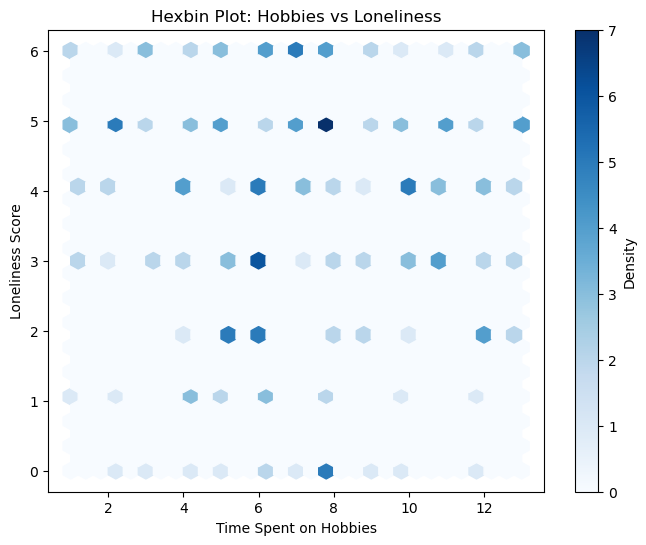

In [20]:
# Hexbin plot to visualize point density
plt.figure(figsize=(8, 6))
plt.hexbin(clean_data['LIFESTYLE_time_use_priorities_hobbies_actual'], 
           clean_data['LONELY_dejong_emotional_social_loneliness_scale_score'], 
           gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.title('Hexbin Plot: Hobbies vs Loneliness')
plt.xlabel('Time Spent on Hobbies')
plt.ylabel('Loneliness Score')
plt.show()


## Relevant Observations

This hexbin plot provides us a visual representation of the density of data points between time spent on hobbies and loneliness scores. From the plot, it is difficult to observe a clear linear relationship, as the points appear scattered without a discernible trend. This suggests that there might not be an immediate linear correlation. However, to properly assess the relationship, we will proceed with further tests to evaluate the linearity and other assumptions of the regression model.

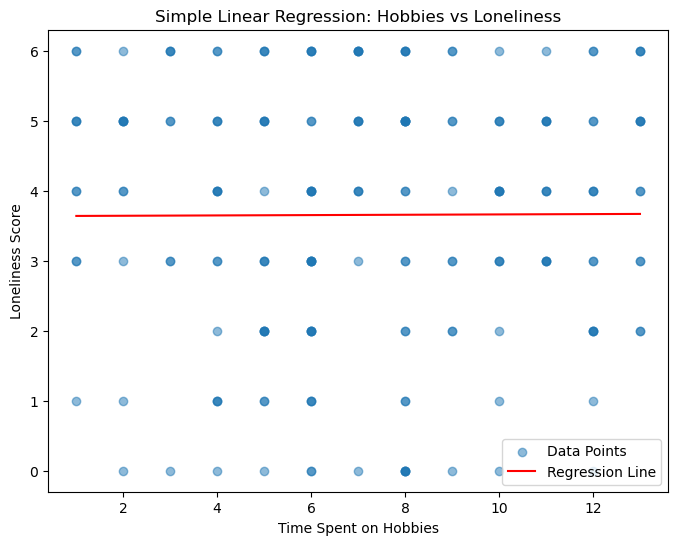

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the regression line
X_reg = np.linspace(clean_data['LIFESTYLE_time_use_priorities_hobbies_actual'].min(), 
                    clean_data['LIFESTYLE_time_use_priorities_hobbies_actual'].max(), 100)
X_reg_with_const = sm.add_constant(X_reg)  # Add constant for intercept
y_reg = model.predict(X_reg_with_const)  # Predict using the model

# Plot the data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(clean_data['LIFESTYLE_time_use_priorities_hobbies_actual'], 
            clean_data['LONELY_dejong_emotional_social_loneliness_scale_score'], 
            alpha=0.5, label='Data Points')
plt.plot(X_reg, y_reg, color='red', label='Regression Line')
plt.title('Simple Linear Regression: Hobbies vs Loneliness')
plt.xlabel('Time Spent on Hobbies')
plt.ylabel('Loneliness Score')
plt.legend()
plt.show()


In [28]:
import statsmodels.api as sm

# Prepare the data for regression (independent variable with constant added)
X = clean_data['LIFESTYLE_time_use_priorities_hobbies_actual']
y = clean_data['LONELY_dejong_emotional_social_loneliness_scale_score']

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression summary, which includes p-values, R-squared, coefficients, etc.
print(model.summary())


                                              OLS Regression Results                                             
Dep. Variable:     LONELY_dejong_emotional_social_loneliness_scale_score   R-squared:                       0.000
Model:                                                               OLS   Adj. R-squared:                 -0.005
Method:                                                    Least Squares   F-statistic:                  0.003851
Date:                                                   Sat, 23 Nov 2024   Prob (F-statistic):              0.951
Time:                                                           23:03:32   Log-Likelihood:                -391.03
No. Observations:                                                    194   AIC:                             786.1
Df Residuals:                                                        192   BIC:                             792.6
Df Model:                                                              1                

### Analysis of Simple Linear Regression Results

#### 1. **R-squared and Adjusted R-squared**
The R-squared value of 0.000 suggests that this model does not explain any of the variability in the dependent variable (loneliness scores) based on the independent variable (time spent on hobbies). In other words, the time spent on hobbies has no significance regarding the variation in loneliness levels within this dataset.

#### 2. **F-statistic and its p-value**
The F-statistic for the model is 0.003851, with a corresponding p-value of 0.951, far above the standard alpha level of 0.05. The high p-value shows that the overall regression model is not statistically significant. This suggests that there is no linear relationship between the independent and dependent variables, and any apparent correlation is likely due to random chance.

#### 3. **Coefficients**
The intercept is 3.6375, which represents the predicted loneliness score when time spent on hobbies is zero. This coefficient is statistically significant with a p-value of 0.000, indicating that there is a baseline level of loneliness that is consistent across the sample. Though, this baseline is unrelated to time spent on hobbies.

The coefficient for time spent on hobbies (LIFESTYLE_time_use_priorities_hobbies_actual) is 0.0024, suggesting a very weak positive relationship between the independent variable and loneliness. However, the p-value for this coefficient is 0.951, way above the alpha value 0.05, meaning this relationship is not statistically significant. This supports the conclusion that time spent on hobbies does not affect loneliness scores.

#### 4. **Standard Errors and Confidence Intervals**
The standard errors for both the intercept and the slope coefficient indicate a degree of variability in the estimates, with the intercept's standard error being 0.306 and the slope's standard error being 0.039. The confidence intervals for these coefficients, ranging from 3.035 to 4.240 for the intercept and -0.074 to 0.078 for the slope, confirm that the slope could be effectively zero, reinforcing the lack of a meaningful relationship between the two variables.

### Conclusion
Based on the simple regression results, we can find no significant evidence of a relationship between time spent on hobbies and loneliness. The very high p-value for the slope coefficient, combined with a low R-squared and the lack of significant results suggests that the hypothesis of a linear relationship is not supported by the data.